In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 각 모듈 import 및 matplotlib 데이터 시각화 시 한글 인코딩을 위한 글씨체 지정

In [54]:
class DataExtract :
    def __init__ (self,filename,column = None):
        self.title = filename    # 파일이름 저장
        self.columns = column    # 중분류, 대분류의 값 저장
        
        try: 
            int(filename[:4])    # 파일이름에 앞 4자리가 년도인경우 밑에 2줄의 코드 실행
            self.data = DataExtract._OpenCsv_(filename)    # _OpenCsv_라는 csv 파일을 여는 함수 실행
            (self.cla, self.simple) = DataExtract._MakeSimpleDataframe_(self,self.columns,filename)
                                                           # csv파일을 모두가져오면 복잡함으로 
                                                           #간단한 형식으로도 불러오는 함수 실행
            
        except:                   # 파일이름에 앞 4자리가 년도가 아닌경우 밑에 7중 코드 실행
            (self._2018_,
             self._2019_,
             self._2020_,
             self._2021_,
             self._2022_,          
             self.data) = DataExtract._Open4YearsCsv_(filename)
            (self.cla, self.simple) = DataExtract._MakeSimpleDataframe_(self,self.columns,filename)
                                   # 2018 ~ 2022년도까지의 각 해의 데이터와 5년치의 데이터를 불러오는 
                                   # _Open4YearsCsv_ 실행
                                   # 데이터 가시화 시 사용할 중분류, 대분류의 value값을 cla에 저장
                                   # 간단한 형식으로 불러오는 함수 실행
        


    def _Open4YearsCsv_(filename):

        _2018_ = DataExtract._OpenCsv_("2018_"+filename)  
        _2018_.rename(columns={'지출액':'18년도 지출액'},inplace = True)
        
        _2019_ = DataExtract._OpenCsv_("2019_"+filename)
        _2019_.rename(columns={'지출액':'19년도 지출액'},inplace = True)
        
        _2020_ = DataExtract._OpenCsv_("2020_"+filename)
        _2020_.rename(columns={'지출액':'20년도 지출액'},inplace = True)
        
        _2021_ = DataExtract._OpenCsv_("2021_"+filename)
        _2021_.rename(columns={'지출액':'21년도 지출액'},inplace = True)
        
        _2022_ = DataExtract._OpenCsv_("2022_"+filename)
        _2022_.rename(columns={'지출액':'22년도 지출액'},inplace = True)
        
        
        _2018_ = DataExtract._MultiIndexing_(_2018_)
        _2019_ = DataExtract._MultiIndexing_(_2019_)
        _2020_ = DataExtract._MultiIndexing_(_2020_)
        _2021_ = DataExtract._MultiIndexing_(_2021_)
        _2022_ = DataExtract._MultiIndexing_(_2022_)
        
        data = pd.concat([_2018_.loc[:,['18년도 지출액']],
                               _2019_.loc[:,['19년도 지출액']],
                               _2020_.loc[:,['20년도 지출액']],
                               _2021_.loc[:,['21년도 지출액']],
                               _2022_.loc[:,['22년도 지출액']]],
                              axis = 1)
        
        data = DataExtract._ReColums_(data,filename)
        

            
        return (_2018_,_2019_,_2020_,_2021_,_2022_,data.reset_index(drop=False))
        
    def _MakeSimpleDataframe_(self,column,filename):
        try:
            int(filename[:4])
        except:
            self.data = DataExtract._ResetColums_(self.data)
            
        if column is not None:
            try:
                cla = list(set(self.data['중분류'].tolist()))
                simple = self.data.loc[:,['기준년월','중분류','지출액']] [self.data.중분류==self.columns]
            except:
                cla = list(set(self.data['대분류'].tolist()))
                simple = self.data.loc[:,['기준년월','대분류','지출액']] [self.data.대분류==self.columns]
        else:
            try:
                cla = list(set(self.data['중분류'].tolist()))
                simple = self.data.loc[:,['기준년월','중분류','지출액']]
            except:
                cla = list(set(self.data['대분류'].tolist()))
                simple = self.data.loc[:,['기준년월','대분류','지출액']]
                
        try:
            int(filename[:4])
        except:
            self.data = DataExtract._ReColums_(self.data,filename)
            simple = DataExtract._ReColums_(simple,filename)
            simple = DataExtract._MultiIndexing_(simple)
        return (cla, simple)

                
    def _OpenCsv_(filename):
        home = 'C:/Users/yms75/Documents/project'
        
        location = ['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','전국',
                   '전남','전북','제주','충남','충북']
        
        location_full_name = ['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시',
                              '대전광역시','부산광역시','서울특별시','세종특별자치시','울산광역시','전국',
                             '전라남도','전라북도','제주특별자치도','충청남도','충청북도']
        
        for region in location:
            if region in filename:
                location_index_num = location.index(region)
            else:
                pass

        dir_csv = os.path.join(home, filename[:4], filename[:4]+"_"+location_full_name[location_index_num], filename)
        dir_csv = dir_csv.replace('\\','/')
            
        return pd.read_csv(dir_csv,encoding="cp949")
    
    def _ReColums_(data,filename=None):
        
        if len(data.columns) == 5:
            data.columns = ['18년도 지출액','19년도 지출액','20년도 지출액','21년도 지출액','22년도 지출액']

        elif len(data.columns) == 7:
            if '전국' in filename:
                data.columns = ['기준년월','대분류','18년도 지출액','19년도 지출액','20년도 지출액','21년도 지출액','22년도 지출액']
            else:
                data.columns = ['기준년월','중분류','18년도 지출액','19년도 지출액','20년도 지출액','21년도 지출액','22년도 지출액']
            
        return data
    
    def _ResetColums_(data):
        data.rename(columns ={'18년도 지출액':'지출액',
                              '19년도 지출액':'지출액',
                              '20년도 지출액':'지출액',
                              '21년도 지출액':'지출액',
                              '22년도 지출액':'지출액'},inplace=True)
        return data
    
    def _MultiIndexing_(data):
        data['기준년월'] = data['기준년월']%100
        try:
            data = data.groupby(['기준년월','대분류'])
        except:
            data = data.groupby(['기준년월','중분류'])
        multi_index = data.first()
        return multi_index

In [55]:
A = DataExtract("전국_관광소비 추이.csv",'콘도')
A.data

,기준년월,대분류,18년도 지출액,19년도 지출액,20년도 지출액,21년도 지출액,22년도 지출액
0,1,골프장,35429908.0,46692360.0,56188977.0,55915060.0,89535428.0
1,1,관광기념품,4723330.0,5234248.0,5167981.0,3021363.0,6515562.0
2,1,관광유원시설,6662306.0,7409828.0,9131803.0,3618587.0,9319906.0
3,1,기타레저,48947189.0,55973561.0,30293653.0,10854740.0,18831474.0
4,1,기타숙박,67423935.0,65207783.0,59865081.0,43546352.0,56817997.0
...,...,...,...,...,...,...,...
239,12,콘도,17921395.0,17728138.0,8746626.0,17846313.0,NaN
240,12,항공운송,51435898.0,67666090.0,6559265.0,17059365.0,NaN
241,12,호텔,58338597.0,58120794.0,26509025.0,43493932.0,NaN
242,7,카지노,NaN,368.0,0.0,NaN,NaN


In [88]:
list(A._2018_.columns)

['광역지자체', '18년도 지출액', '전년도 지출액']

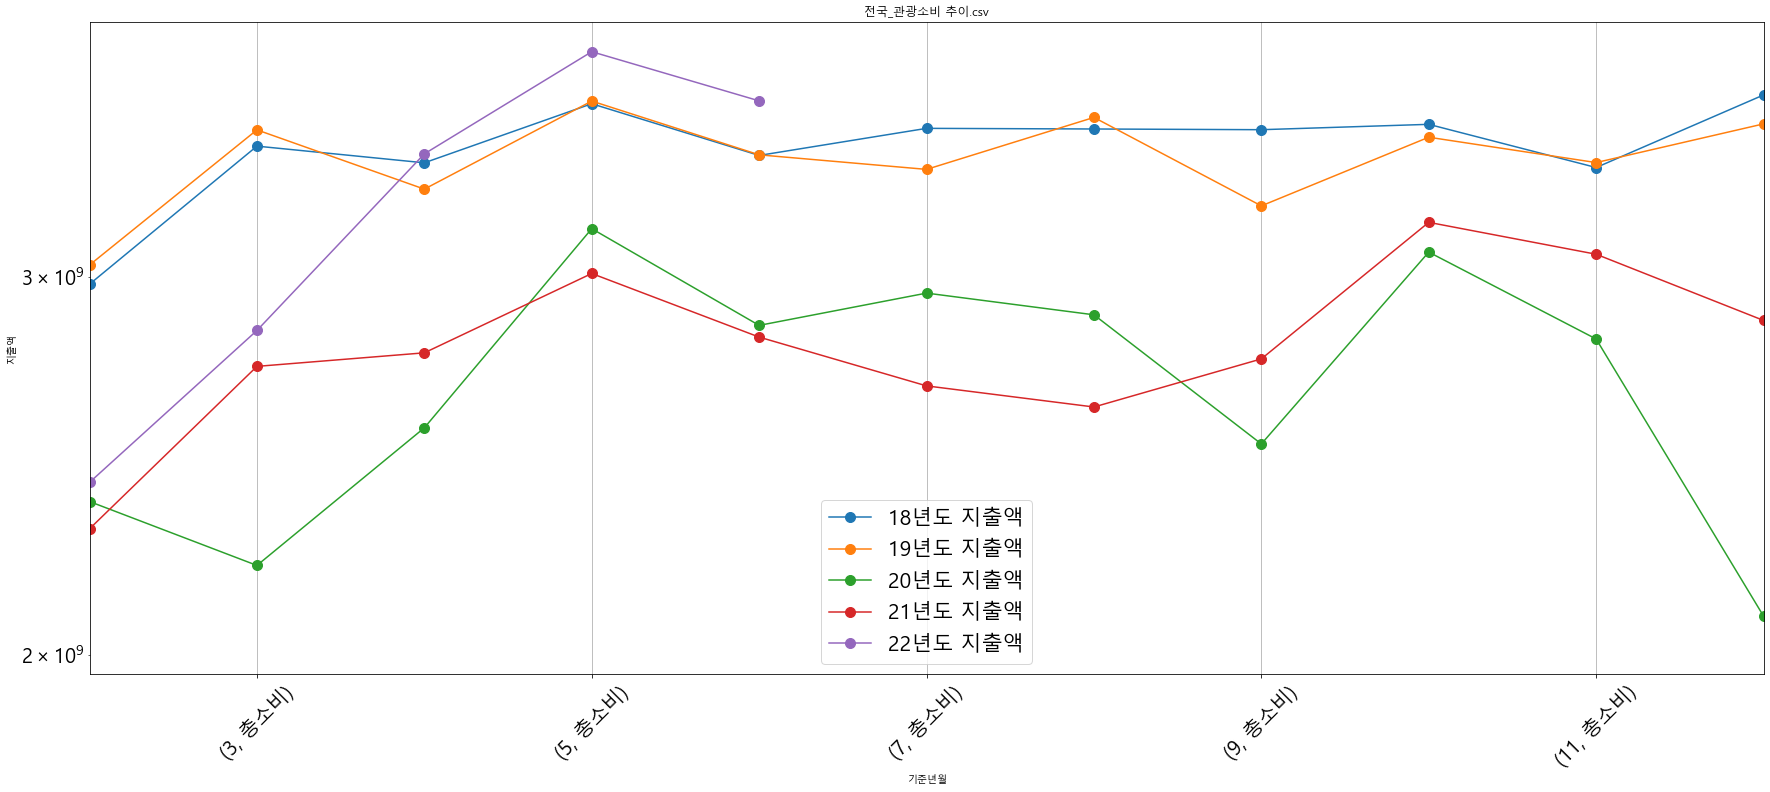

In [89]:

A = DataExtract("전국_관광소비 추이.csv",'총소비')
A.simple.plot(kind='line',logy=True, figsize=(30, 12),
              grid=True,rot=45,fontsize = 20,ms=10,marker='o',)
plt.title(A.title)
plt.xlabel("기준년월")
plt.ylabel("지출액")
plt.ylim()
plt.xlim(1,11)
plt.legend(fontsize = 21)
plt.show()

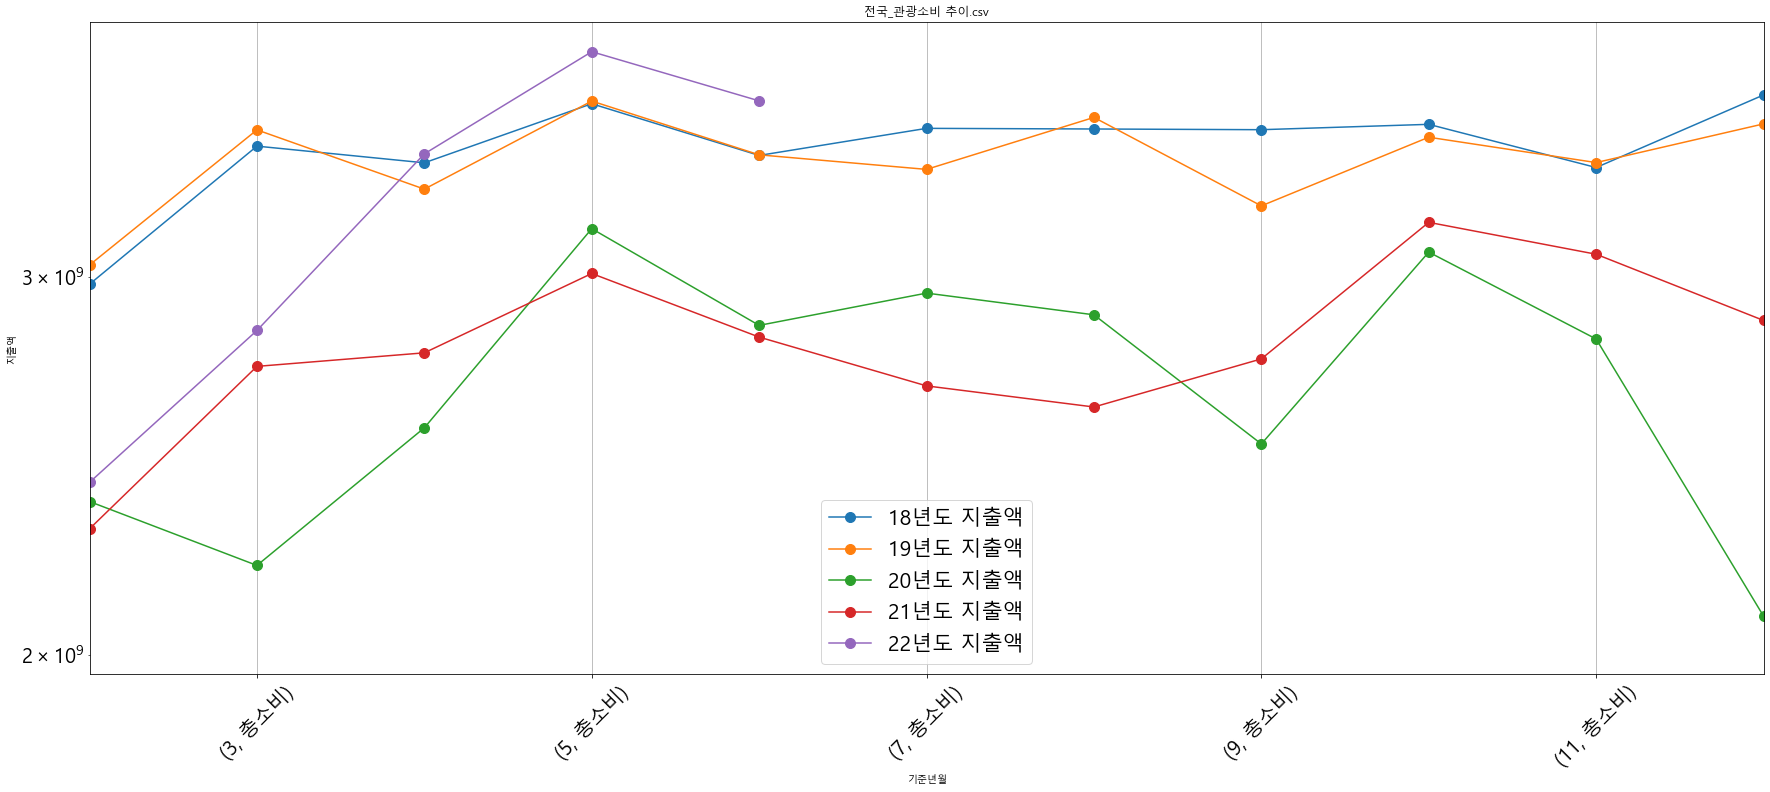

In [143]:
A.simple.plot(kind='line',logy=True, figsize=(30, 12),
              grid=True,rot=45,fontsize = 20,ms=10,marker='o',)
plt.title(A.title)
plt.xlabel("기준년월")
plt.ylabel("지출액")
plt.ylim()
plt.xlim(1,11)
plt.legend(fontsize = 21)
plt.show()

In [112]:
def MakeSimple(data,col = None):
    data_col = str(data.columns[1])
    data = pd.DataFrame(data)
    del data['광역지자체']
    del data['전년도 지출액']
    simple = pd.DataFrame(data)
    simple.columns = ['지출액']
    simple = pd.DataFrame(simple)
    simple.reset_index(drop = False,inplace = True)
    if col is not None:
        try:
            simple = simple.loc[:,['기준년월','중분류','지출액']] [simple.중분류==col]
        except:
            simple = simple.loc[:,['기준년월','대분류','지출액']] [simple.대분류==col]
    else:
        try:
            simple = simple.loc[:,['기준년월','중분류','지출액']]
        except:
            simple = simple.loc[:,['기준년월','대분류','지출액']]
    try:
        simple = simple.groupby(['기준년월','대분류'])
    except:
        simple = simple.groupby(['기준년월','중분류'])
    simple=simple.first()
    simple.columns = [data_col]

    return simple

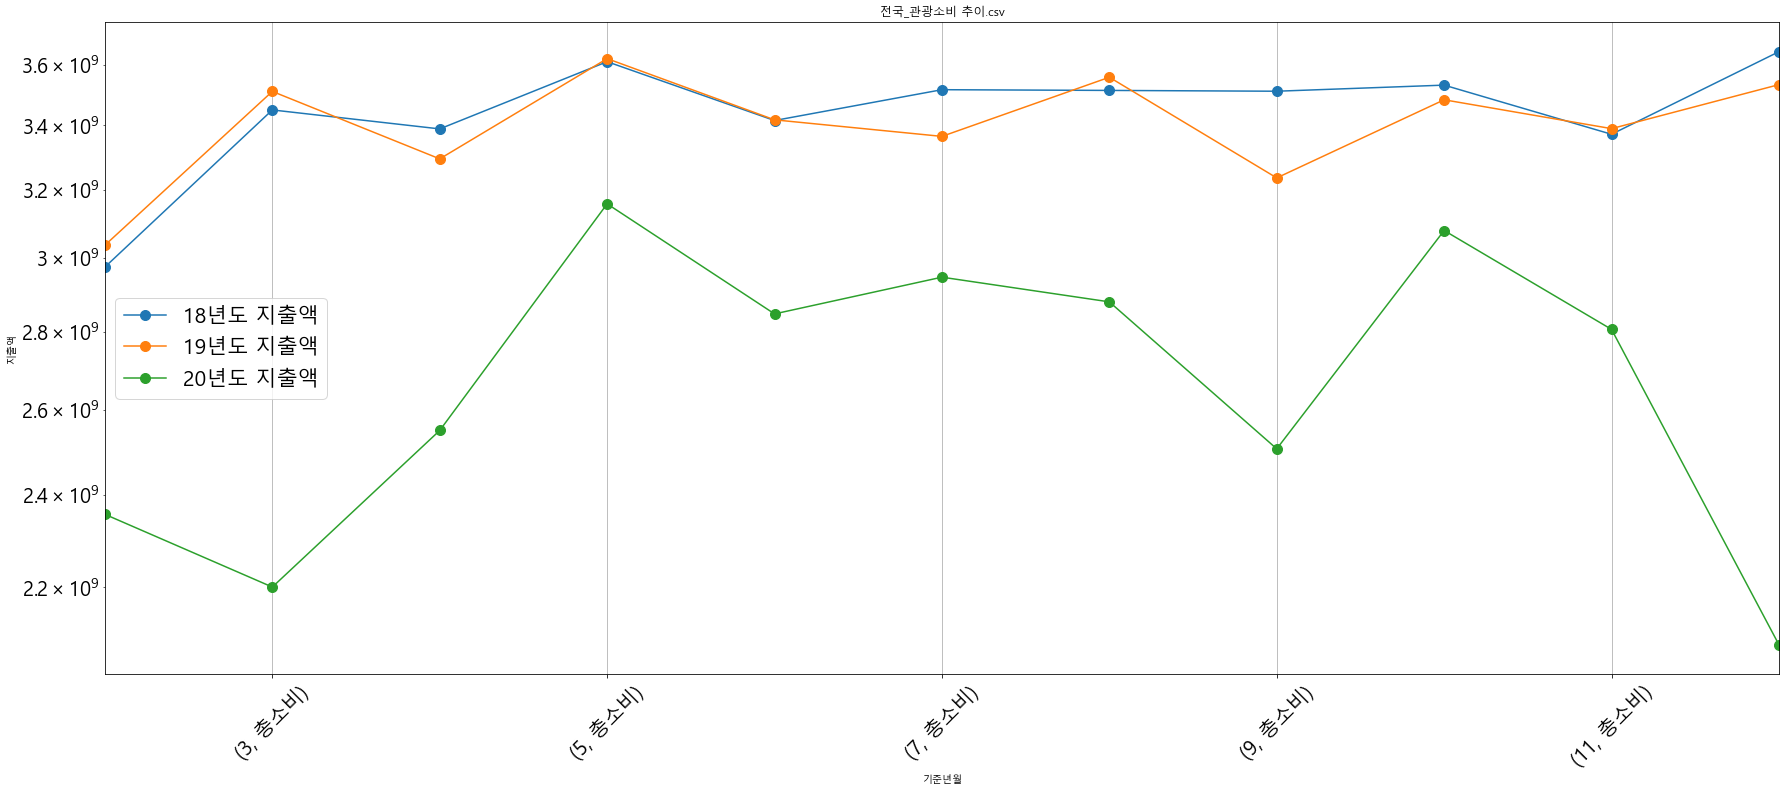

In [115]:
A_2018_simple = MakeSimple(A._2018_,'총소비')
A_2019_simple = MakeSimple(A._2019_,'총소비')
A_2020_simple = MakeSimple(A._2020_,'총소비')
A_181920_simple = pd.concat([A_2018_simple,A_2019_simple,A_2020_simple],axis = 1)
A_181920_simple.plot(kind='line',logy=True, figsize=(30, 12),
              grid=True,rot=45,fontsize = 20,ms=10,marker='o',)

plt.title(A.title)
plt.xlabel("기준년월")
plt.ylabel("지출액")
plt.ylim()
plt.xlim(1,11)
plt.legend(fontsize = 21)
plt.show()

In [95]:
B = pd.DataFrame(A._2018_)
# del B['광역지자체']
# del B['전년도 지출액']
B

광역지자체      18년도 지출액  전년도 지출액
기준년월 대분류                                
1    골프장       전국  3.542991e+07      0.0
     관광기념품     전국  4.723330e+06      0.0
     관광유원시설    전국  6.662306e+06      0.0
     기타레저      전국  4.894719e+07      0.0
     기타숙박      전국  6.742394e+07      0.0
...           ...           ...      ...
12   총소비       전국  3.644825e+09      0.0
     캠핑장/펜션    전국  2.833990e+05      0.0
     콘도        전국  1.792140e+07      0.0
     항공운송      전국  5.143590e+07      0.0
     호텔        전국  5.833860e+07      0.0

[242 rows x 3 columns]